<a href="https://colab.research.google.com/github/Saifullah785/machine-learning-engineer-roadmap/blob/main/Lecture_61_Softmax_Regression_and_Multinomial_Logistic_Regression/Lecture_61_Polynomial_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# Import necessary libraries: numpy for numerical operations, pandas for data manipulation, and matplotlib.pyplot for plotting.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
# Load the dataset from the 'ushape.csv' file into a pandas DataFrame.
df = pd.read_csv('ushape.csv')

In [44]:
# Display the first 5 rows of the DataFrame to get a preview of the data.
df.head()

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


In [45]:
# Separate the features (X) and the target variable (y).
# X contains the first two columns ('X' and 'Y'), and y contains the last column ('class').
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

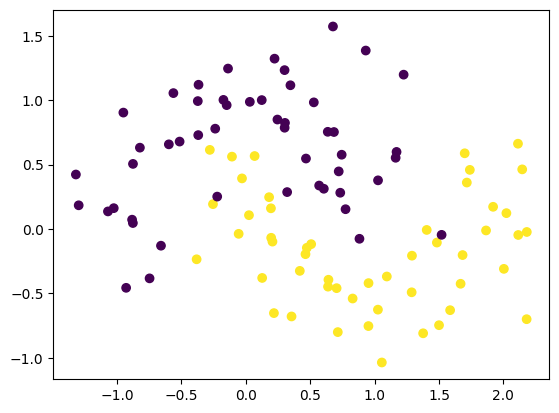

In [46]:
# Create a scatter plot of the data points.
# The x-coordinates are the first column of X, the y-coordinates are the second column of X, and the color of the points is determined by the values in y.
plt.scatter(X[:,0],X[:,1],c=y)

In [47]:
# Import the LogisticRegression model from scikit-learn.
# Initialize a LogisticRegression model.
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [48]:
# Train the LogisticRegression model on the data.
clf.fit(X,y)

LogisticRegression()

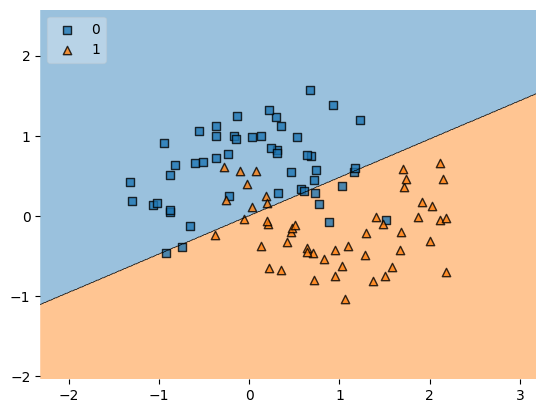

In [49]:
# Import the plot_decision_regions function from mlxtend.plotting.
from mlxtend.plotting import plot_decision_regions

# Plot the decision boundary of the trained LogisticRegression model.
# X and y are the data, clf is the trained classifier, and legend=2 displays the legend.
plot_decision_regions(X,y.astype('int'),clf, legend=2)
# Display the plot.
plt.show()

In [50]:
# Import the cross_val_score function from scikit-learn for cross-validation.
from sklearn.model_selection import cross_val_score

# Calculate the mean accuracy of the Logistic Regression model using 10-fold cross-validation.
# The scoring metric is 'accuracy'.
np.mean(cross_val_score(clf,X,y,scoring='accuracy',cv=10))*100

np.float64(83.0)

In [51]:
# Import the PolynomialFeatures class from scikit-learn for polynomial feature transformation.
from sklearn.preprocessing import PolynomialFeatures

# Initialize PolynomialFeatures with degree 3 and no bias term.
poly = PolynomialFeatures(degree=3, include_bias=False)
# Transform the original features (X) into polynomial features.
X_trf = poly.fit_transform(X)

In [52]:
# Initialize a new LogisticRegression model.
clf1 = LogisticRegression()

# Calculate the mean accuracy of the Logistic Regression model trained on polynomial features using 10-fold cross-validation.
np.mean(cross_val_score(clf1,X_trf,y,scoring='accuracy',cv=10))*100

np.float64(90.0)

In [53]:
# Define a function to plot the decision boundary of a Logistic Regression model with polynomial features.
def plot_decision_boundary(X,y,degree=1):

    # Initialize PolynomialFeatures with the specified degree.
    poly = PolynomialFeatures(degree=degree)
    # Transform the input features (X) into polynomial features.
    X_trf = poly.fit_transform(X)

    # Initialize and train a LogisticRegression model on the transformed features.
    clf = LogisticRegression()
    clf.fit(X_trf,y)

    # Calculate the mean accuracy of the model using 10-fold cross-validation.
    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))*100

    # Create a meshgrid for plotting the decision boundary.
    a = np.arange(start=X[:,0].min()-1,stop=X[:,0].max()+1,step=0.01)
    b = np.arange(start=X[:,1].min()-1,stop=X[:,1].max()+1,step=0.01)

    XX, YY = np.meshgrid(a,b)

    # Create input array for prediction.
    input_array = np.array([XX.ravel(), YY.ravel()]).T

    # Predict the labels for the meshgrid points using the trained model and transformed input.
    labels = clf.predict(poly.transform(input_array))

    # Plot the decision boundary as a contour filled area.
    plt.contourf(XX, YY, labels.reshape(XX.shape),alpha=0.5)
    # Plot the original data points.
    plt.scatter(X[:,0],X[:,1],c=y)

    # Set the title of the plot showing the degree of polynomial features and the accuracy.
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

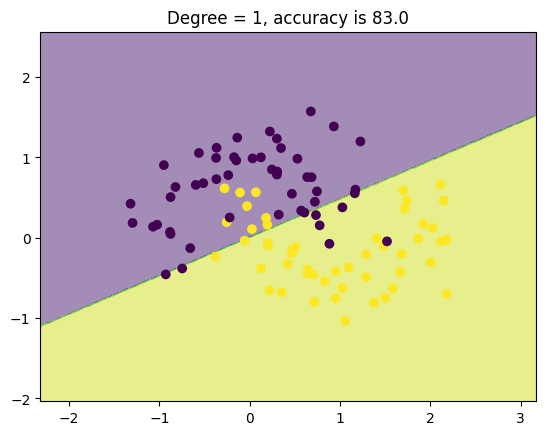

In [54]:
# Plot the decision boundary with degree 1 polynomial features (linear).
plot_decision_boundary(X,y)

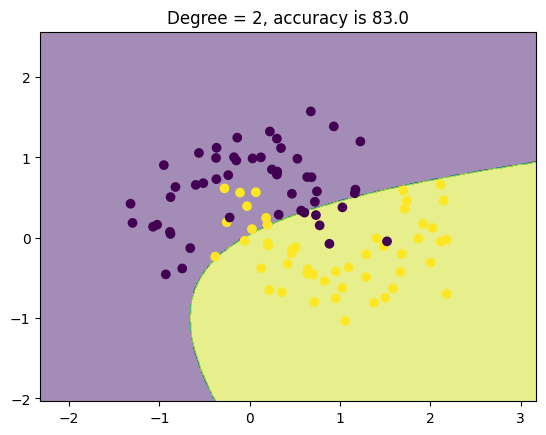

In [55]:
# Plot the decision boundary with degree 2 polynomial features.
plot_decision_boundary(X,y,degree=2)

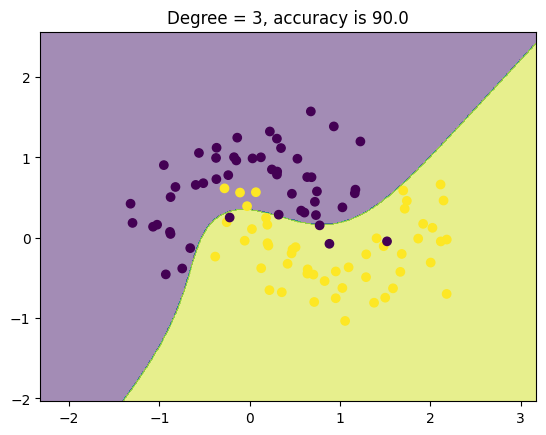

In [56]:
# Plot the decision boundary with degree 3 polynomial features.
plot_decision_boundary(X,y,degree=3)

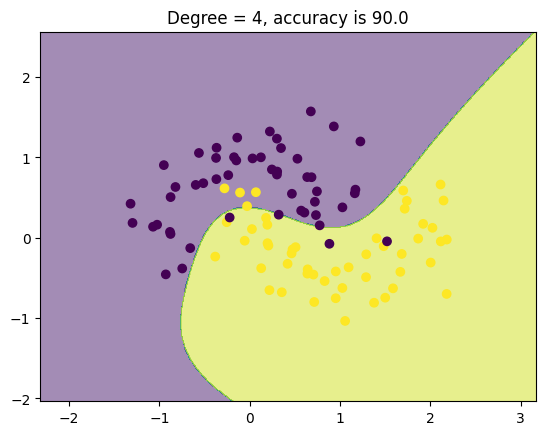

In [57]:
# Plot the decision boundary with degree 4 polynomial features.
plot_decision_boundary(X,y,degree=4)

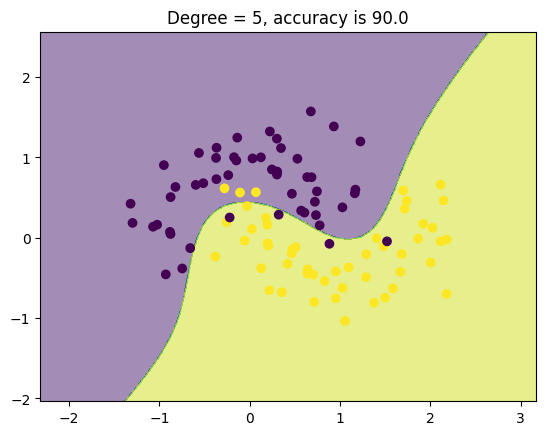

In [58]:
# Plot the decision boundary with degree 5 polynomial features.
plot_decision_boundary(X,y,degree=5)

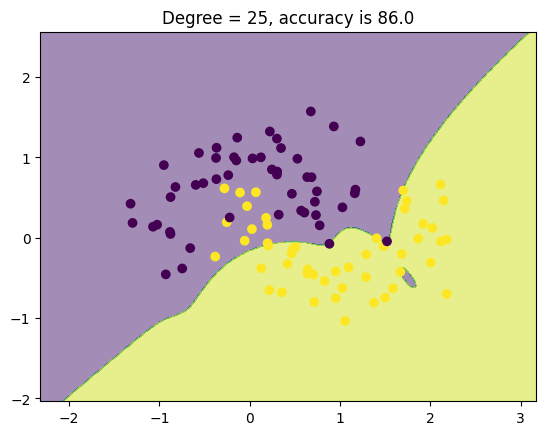

In [59]:
# Plot the decision boundary with degree 25 polynomial features.
plot_decision_boundary(X,y,degree=25)